# Interpolación de Lagrange

In [11]:
import numpy as np
import matplotlib.pyplot as plt



def bary_interpol(puntosx, puntosy, x):
    n = puntosx.size
    pesos = np.ones_like(puntosx)
    for i in range(n):
        for j in range(n):
            if j != i:
                pesos[i] *= (puntosx[i]-puntosx[j])
    pesos = 1/pesos
    if not np.any(puntosx == x):
        numerador = np.sum(pesos*puntosy/(x-puntosx))
        denominador = np.sum(pesos/(x-puntosx))
        predic = numerador/denominador
    else:
        k = np.where(x == puntosx)[0]
        predic = puntosy[k[0]]
        
    return predic

# Range función
func = lambda x: 1/(1+25*x**2)

# generando datos ficticios
def generatedata(n, f, nodes="cheb"):
    if nodes=="cheb":
        puntosx = -np.cos(np.linspace(0,np.pi,n))
    else:
        puntosx = np.linspace(-1,1,n) 
    
    puntosy = f(puntosx)
    return puntosx, puntosy

puntosx, puntosy = generatedata(15, func)
#pesos = wsubk(puntosx)
x = 0.3
pofx = bary_interpol(puntosx, puntosy, x)

print(x, pofx, func(x))

puntosx, puntosy = generatedata(30, func)
#pesos = wsubk(puntosx)
pofx = bary_interpol(puntosx, puntosy, x)

print(x, pofx, func(x))

0.3 0.2592750581841138 0.3076923076923077
0.3 0.30919782568113174 0.3076923076923077


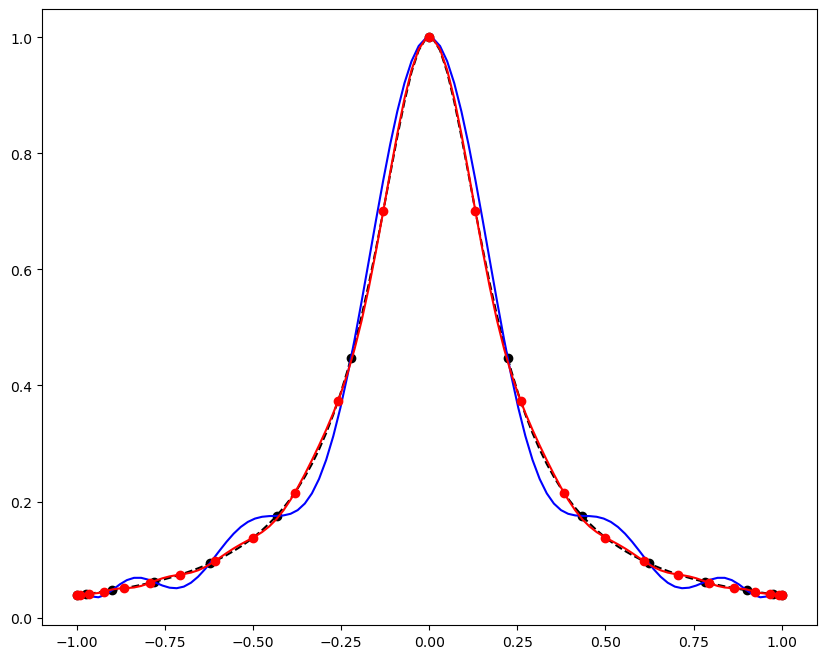

In [12]:
pof1x = lambda x, puntosx, puntosy: bary_interpol(puntosx, puntosy, x)
x_values = np.linspace(-1, 1, 100)

fig = plt.figure(figsize=(10, 8))
plt.plot(x_values, func(x_values), 'k--')

# usando 15 datos
puntosx, puntosy = generatedata(15, func)
daty_15 = np.array([pof1x(i, puntosx, puntosy) for i in x_values])  # Convertir a array NumPy
plt.plot(puntosx, puntosy, 'ko')
plt.plot(x_values, daty_15, c='b')

# usando 25 datos
puntosx, puntosy = generatedata(25, func)
daty_25 = np.array([pof1x(i, puntosx, puntosy) for i in x_values])  # Convertir a array NumPy
plt.plot(puntosx, puntosy, 'ro')
plt.plot(x_values, daty_25, c='r')

plt.show()


In [ ]:
0.3 0.2592750581841138 0.3076923076923077
0.3 0.3091978256811317 0.3076923076923077

#def wsubk(puntosx):
   # n = puntosx.size
    #pesos = np.ones_like(puntosx)
   # for k in range(n):
  #      for j in range(n):
   #         if j != k:
        #        pesos[k] *= (puntosx[k]-puntosx[j])
    #pesos = 1/pesos